In [1]:
import pandas as pd

In [2]:
game_df=pd.read_excel('Game.xlsx')

In [3]:
# Drop the "Photo," "Flag," and "Club Logo" columns
columns_to_drop = ['Photo', 'Flag', 'Club Logo']
game_df.drop(columns=columns_to_drop, inplace=True)


In [4]:
null_values = game_df.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()

# Display the results
print("Null values in each column:")
print(null_counts)

Null values in each column:
ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64


In [5]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = game_df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Display the number of duplicate rows
print("Number of duplicate rows in the DataFrame: ", num_duplicates)


Number of duplicate rows in the DataFrame:  0


In [6]:
dup_cols= set()

for x in range (game_df.shape[1]):
    base_col = game_df.iloc[:,x]
    for y in range(x+1, game_df.shape[1]):
        comp_col = game_df.iloc[:,y]
        
        if base_col.equals(comp_col):
            dup_cols.add(game_df.columns.values[y])



print(dup_cols)

{'RF', 'RWB', 'RDM', 'CB', 'RS', 'CF', 'CAM', 'RM', 'RB', 'RCB', 'RW', 'RAM', 'RCM', 'CM', 'ST', 'CDM'}


In [10]:

# Drop the duplicate columns from the DataFrame
game_df.drop(columns=dup_cols, inplace=True)

# Display the DataFrame after dropping the duplicate columns
print(game_df)


           ID          Name  Age  Nationality  Overall  Potential  \
0          16   Luis García   37        Spain       71         71   
1          41       Iniesta   34        Spain       86         86   
2          80  E. Belözoğlu   37       Turkey       79         79   
3         164      G. Pinzi   37        Italy       70         70   
4         657    D. Vaughan   35        Wales       66         66   
...       ...           ...  ...          ...      ...        ...   
18202  246609    J. Requena   19    Argentina       57         72   
18203  246613     J. Zwarts   19  Netherlands       62         77   
18204  246616     José Uche   18        Spain       58         69   
18205  246617     Javi Mier   19        Spain       62         76   
18206  246620      E. McCue   17       Sweden       51         74   

                        Club   Value  Wage  Special  ... Composure  Marking  \
0                  KAS Eupen   €750K   €6K     1906  ...      79.0     70.0   
1            

In [11]:
# Remove non-numeric characters (e.g., '$', 'K', 'M') and convert to numeric type
game_df['Wage'] = game_df['Wage'].replace({'\€': '', 'K': 'e3', 'M': 'e6'}, regex=True).astype(float)

In [12]:
# Remove 'lbs' from the 'Weight' column and convert it to float
game_df['Weight'] = game_df['Weight'].str.replace('lbs', '').astype(float)

C:\Users\Ayushi Sharma\AppData\Local\Temp\ipykernel_21672\3781358158.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = game_df.corr()


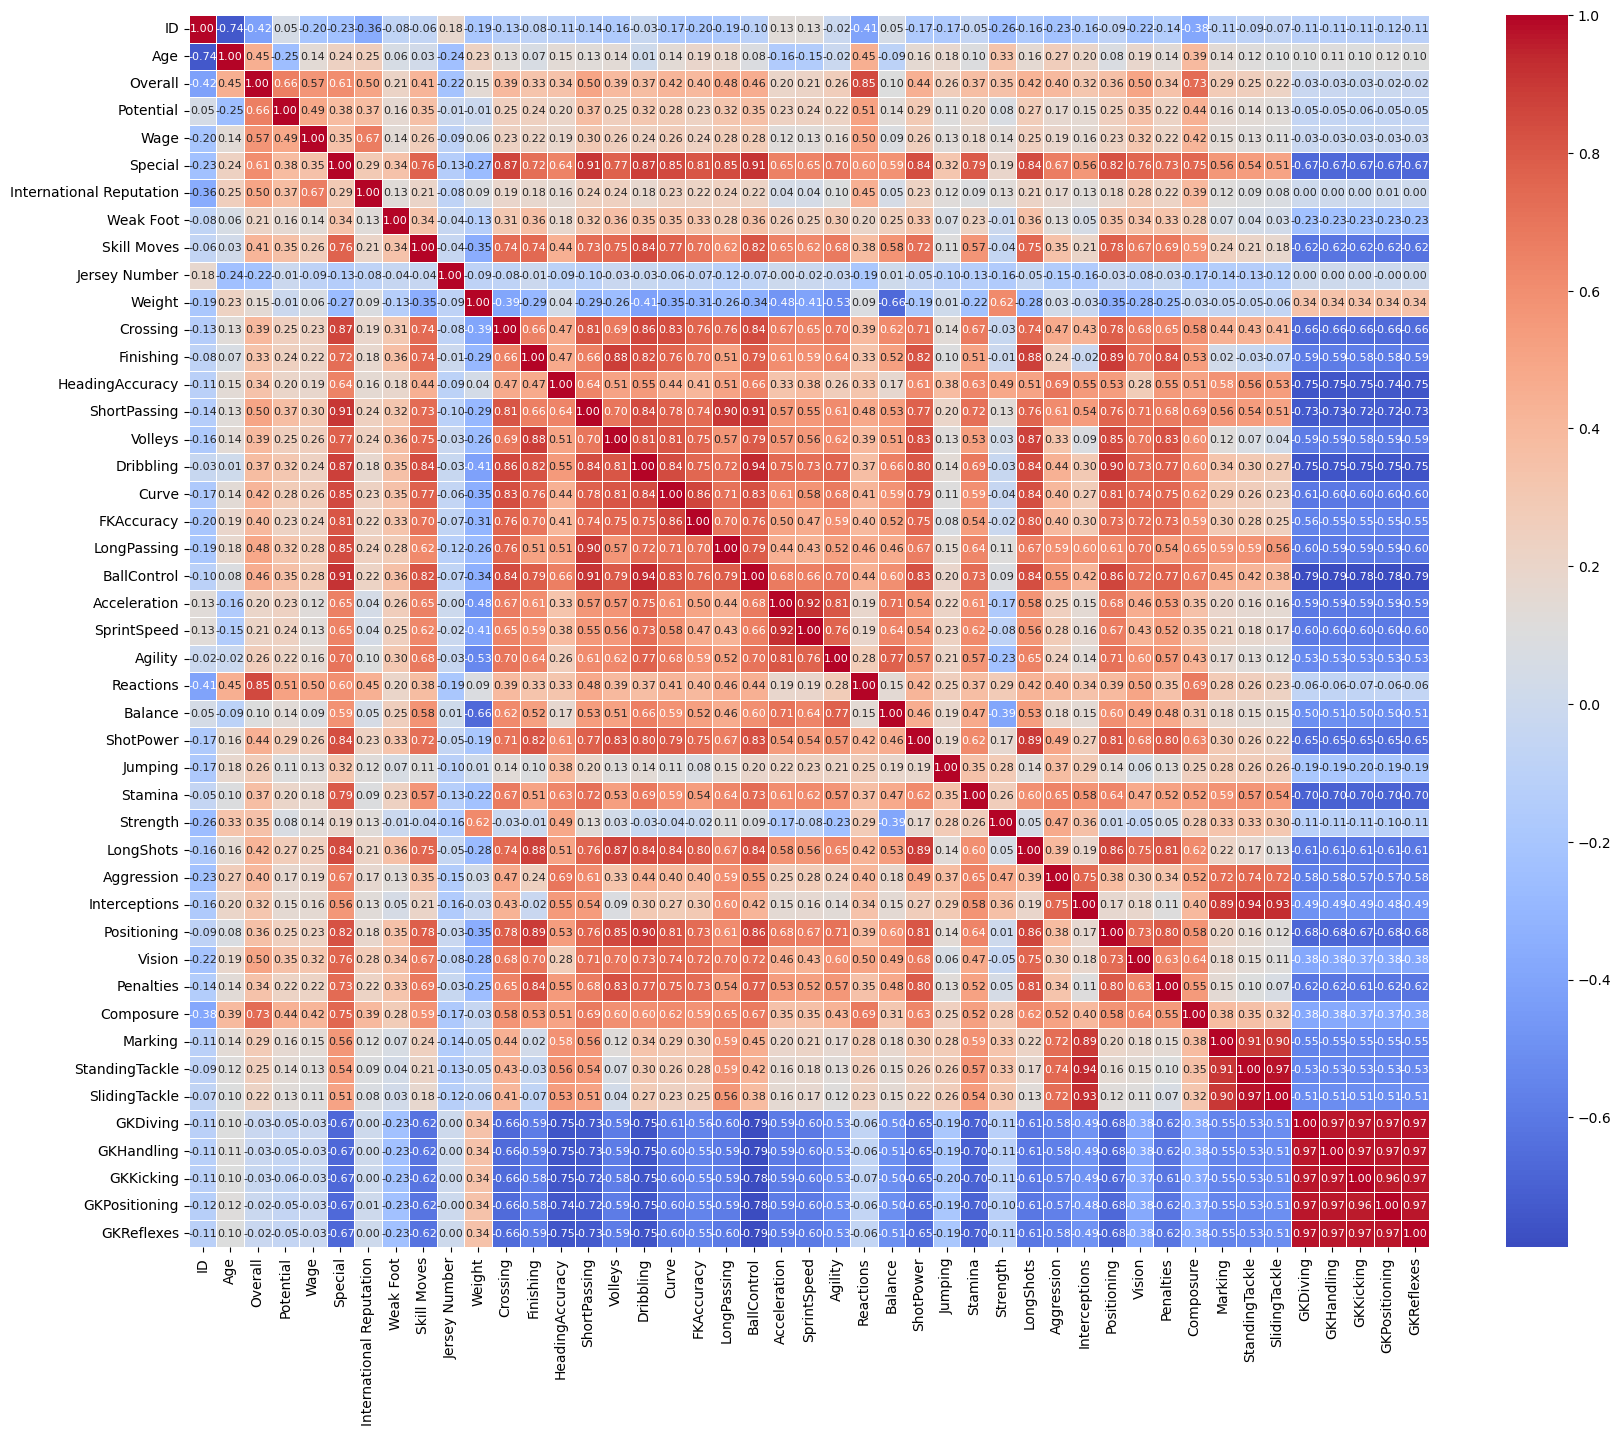

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the 'game_df' DataFrame

# Calculate the correlation matrix for the features in the DataFrame
corr_matrix = game_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 8})

# Show the plot
plt.show()
